# Step 1

In [ ]:
# Kết nối Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Chỉ định thư mục làm việc hiện hànhSS
import os
colab_dir = '/content/gdrive/My Drive/Colab Notebooks'
path      = colab_dir 

# Chuyển thư mục hiện hành
%cd $path 

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks


In [ ]:
!pip install stanza
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.5/802.5 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=765a6efaba5935a8443b0e0230df13d0d17c50875254122ab54096f8bf0a5b09
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 87.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681847 sha256=5ab

In [ ]:
import pandas as pd
import nltk
from nltk import tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import sentiwordnet as swn
import string 
import re
from sklearn.metrics import accuracy_score
import gensim
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow 
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
# from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import Embedding
from keras.preprocessing import sequence
from keras.layers import LSTM, Convolution1D, Flatten, Dropout
from keras.callbacks import TensorBoard
from string import punctuation
from nltk import word_tokenize, pos_tag, ne_chunk
import stanza
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('sentiwordnet')
stanza.download('en')
stanza.install_corenlp()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Installing CoreNLP package into /root/stanza_corenlp


#Step 2

In [ ]:
def preprocess(text):
  lemma = WordNetLemmatizer()
  stopwords_english = stopwords.words('english')  #lấy danh sách từ stopword
  # đổi từ viết tắt thành chữ thường
  text = re.sub(r"won't", "will not", text)
  text = re.sub(r"can\'t", "can not", text)
  text = re.sub(r"n\'t", " not", text)
  text = re.sub(r"\'re", " are", text)
  text = re.sub(r"\'s", " is", text)
  text = re.sub(r"\'d", " would", text)
  text = re.sub(r"\'ll", " will", text)
  text = re.sub(r"\'t", " not", text)
  text = re.sub(r"\'ve", " have", text)
  text = re.sub(r"\'m", " am", text)
  text = re.sub(r'http\S+', '', text)
  # print(text)
  # pat1 = r'@[A-Za-z0-9]+'
  # combined_pat = r'|'.join((pat1, pat2))

  text = re.sub(r'@\w+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'\d', '', text)
  

  text=re.sub(r'[^\w]', ' ', text) # xóa ký tự đặc biệt
  text = tokenize.word_tokenize(text) # tách từ
  new_text=[]
  for word in text:
    if word not in stopwords_english:

      new_text.append(lemma.lemmatize(word.lower())) #chuyển về từ nguyên gốc 
  sentence=" ".join(new_text)
  # print(sentence)
  return sentence


In [ ]:
df = pd.read_csv('T.Cach/autolabel_2728_Trump.Kim.csv')
df

,#,Tweets\n{Realtime from API Twitter},Clean_Tweets\n{After Clean Tweets},DeepLearing\n{Predict based on Model Trained},"SentimentWordNet\n{ <0 - negative, >0 - positive}","SentimentCoreNLP\n{0 - negative, 4 - positive}"
0,1,@realDonaldTrump Exactly! They're nothing but ...,NaN,NaN,NaN,NaN
1,2,@realDonaldTrump Tremendous crowds? ?,NaN,NaN,NaN,NaN
2,3,@DrDenaGrayson @realDonaldTrump So you want war?,NaN,NaN,NaN,NaN
3,4,@Sevronosaurus @BashAlaniz @hahaohman @Sanchob...,NaN,NaN,NaN,NaN
4,5,@realDonaldTrump You are aiding and abetting a...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
11673,11674,@marklevinshow Look at all these rightwing syc...,NaN,NaN,NaN,NaN
11674,11675,@Dcon02005861 @jxf74 @martine_piers @LZ181818 ...,NaN,NaN,NaN,NaN
11675,11676,@BobTore @ABC @realDonaldTrump Some people wil...,NaN,NaN,NaN,NaN
11676,11677,@TomJChicago @IvankaTrump Or being him to Colo...,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna(subset = ['Tweets\n{Realtime from API Twitter}'])
df.isnull().sum()

#                                                        0
Tweets\n{Realtime from API Twitter}                      0
Clean_Tweets\n{After Clean Tweets}                   11666
DeepLearing\n{Predict based on Model Trained}        11666
SentimentWordNet\n{ <0 - negative, >0 - positive}    11666
SentimentCoreNLP\n{0 - negative, 4 - positive}       11666
dtype: int64

In [ ]:
df['Clean_Tweets\n{After Clean Tweets}'] = df['Tweets\n{Realtime from API Twitter}'].apply(preprocess)
df

,#,Tweets\n{Realtime from API Twitter},Clean_Tweets\n{After Clean Tweets},DeepLearing\n{Predict based on Model Trained},"SentimentWordNet\n{ <0 - negative, >0 - positive}","SentimentCoreNLP\n{0 - negative, 4 - positive}"
0,1,@realDonaldTrump Exactly! They're nothing but ...,exactly they nothing liar,NaN,NaN,NaN
1,2,@realDonaldTrump Tremendous crowds? ?,tremendous crowd,NaN,NaN,NaN
2,3,@DrDenaGrayson @realDonaldTrump So you want war?,so want war,NaN,NaN,NaN
3,4,@Sevronosaurus @BashAlaniz @hahaohman @Sanchob...,no,NaN,NaN,NaN
4,5,@realDonaldTrump You are aiding and abetting a...,you aiding abetting international criminal jus...,NaN,NaN,NaN
...,...,...,...,...,...,...
11673,11674,@marklevinshow Look at all these rightwing syc...,look rightwing sycophant defending trump hanni...,NaN,NaN,NaN
11674,11675,@Dcon02005861 @jxf74 @martine_piers @LZ181818 ...,i e i refute fact i,NaN,NaN,NaN
11675,11676,@BobTore @ABC @realDonaldTrump Some people wil...,some people sleep end good luck,NaN,NaN,NaN
11676,11677,@TomJChicago @IvankaTrump Or being him to Colo...,or colorado euthanasia legal,NaN,NaN,NaN


#Step 3

In [ ]:
EMBEDDING_DIM = 100

modelW2V = gensim.models.Word2Vec.load("T.Cach/word2vec.model")
embedding_matrix = np.zeros((len(modelW2V.wv.vocab)+1, EMBEDDING_DIM))
word2index = {}
embedding_matrix[0]=np.zeros( EMBEDDING_DIM)
for i in range(len(modelW2V.wv.vocab)):
    embedding_vector = modelW2V.wv[modelW2V.wv.index2word[i]]
    if embedding_vector is not None:
        embedding_matrix[i+1] = embedding_vector
        word2index[modelW2V.wv.index2word[i]] = i+1

In [ ]:
MAX_SEQUENCE_LENGTH=50

model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0],
                            output_dim=embedding_matrix.shape[1], 
                            input_length=MAX_SEQUENCE_LENGTH,
                            weights=[embedding_matrix], 
                            trainable=False))
model.add(LSTM(100,input_shape=(MAX_SEQUENCE_LENGTH, 1))) 
#model.add(Flatten())

model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(Dense(1,activation='sigmoid'))
model.load_weights('T.Cach/model_trained_full.h5')

In [ ]:


clean_text =  df['Clean_Tweets\n{After Clean Tweets}']
deep_score = []

for data in clean_text.items():
    indices = [];
    #print(data[1])
    for w in data[1].split():
        if w in modelW2V.wv.vocab:
            indices.append(word2index[re.sub(r'[^\w\s]','',w).lower()])

    data_pad = pad_sequences([indices], maxlen=MAX_SEQUENCE_LENGTH)
    scores = model.predict(data_pad, verbose = 0)          
    deep_score.append(scores.item(0))


In [ ]:
df['DeepLearing\n{Predict based on Model Trained}'] = deep_score
df

,#,Tweets\n{Realtime from API Twitter},Clean_Tweets\n{After Clean Tweets},DeepLearing\n{Predict based on Model Trained},"SentimentWordNet\n{ <0 - negative, >0 - positive}","SentimentCoreNLP\n{0 - negative, 4 - positive}"
0,1,@realDonaldTrump Exactly! They're nothing but ...,exactly they nothing liar,0.439919,NaN,NaN
1,2,@realDonaldTrump Tremendous crowds? ?,tremendous crowd,0.920145,NaN,NaN
2,3,@DrDenaGrayson @realDonaldTrump So you want war?,so want war,0.294979,NaN,NaN
3,4,@Sevronosaurus @BashAlaniz @hahaohman @Sanchob...,no,0.166680,NaN,NaN
4,5,@realDonaldTrump You are aiding and abetting a...,you aiding abetting international criminal jus...,0.915786,NaN,NaN
...,...,...,...,...,...,...
11673,11674,@marklevinshow Look at all these rightwing syc...,look rightwing sycophant defending trump hanni...,0.911173,NaN,NaN
11674,11675,@Dcon02005861 @jxf74 @martine_piers @LZ181818 ...,i e i refute fact i,0.734702,NaN,NaN
11675,11676,@BobTore @ABC @realDonaldTrump Some people wil...,some people sleep end good luck,0.766210,NaN,NaN
11676,11677,@TomJChicago @IvankaTrump Or being him to Colo...,or colorado euthanasia legal,0.916168,NaN,NaN


In [ ]:

senti_score = []

for text in clean_text:
  sentences = nltk.sent_tokenize(text)
  stokens = [nltk.word_tokenize(sent) for sent in sentences]
  taggedlist=[]
  for stoken in stokens:        
      taggedlist.append(nltk.pos_tag(stoken))
  wnl = nltk.WordNetLemmatizer()

  score_list=[]
  for idx,taggedsent in enumerate(taggedlist):
      score_list.append([])
      for idx2,t in enumerate(taggedsent):
          newtag=''
          lemmatized=wnl.lemmatize(t[0])
          if t[1].startswith('NN'):
              newtag='n'
          elif t[1].startswith('JJ'):
              newtag='a'
          elif t[1].startswith('V'):
              newtag='v'
          elif t[1].startswith('R'):
              newtag='r'
          else:
              newtag=''       
          if(newtag!=''):    
              synsets = list(swn.senti_synsets(lemmatized, newtag))
              #Getting average of all possible sentiments, as you requested        
              score=0
              if(len(synsets)>0):
                  for syn in synsets:
                      score+=syn.pos_score()-syn.neg_score()
                  score_list[idx].append(score/len(synsets))
              

  # sentence_sentiment=[]

  for score_sent in score_list:
    try:
      sentence_sentiment= sum([word_score for word_score in score_sent])/len(score_sent)
    except ZeroDivisionError:
      sentence_sentiment= 0
  # print(sentence_sentiment)
  senti_score.append(sentence_sentiment)


In [ ]:
df['SentimentWordNet\n{ <0 - negative, >0 - positive}'] = senti_score
df
#-0.1527 0.104166666666

,#,Tweets\n{Realtime from API Twitter},Clean_Tweets\n{After Clean Tweets},DeepLearing\n{Predict based on Model Trained},"SentimentWordNet\n{ <0 - negative, >0 - positive}","SentimentCoreNLP\n{0 - negative, 4 - positive}"
0,1,@realDonaldTrump Exactly! They're nothing but ...,exactly they nothing liar,0.439919,-0.152778,NaN
1,2,@realDonaldTrump Tremendous crowds? ?,tremendous crowd,0.920145,0.104167,NaN
2,3,@DrDenaGrayson @realDonaldTrump So you want war?,so want war,0.294979,-0.031250,NaN
3,4,@Sevronosaurus @BashAlaniz @hahaohman @Sanchob...,no,0.166680,0.000000,NaN
4,5,@realDonaldTrump You are aiding and abetting a...,you aiding abetting international criminal jus...,0.915786,-0.116667,NaN
...,...,...,...,...,...,...
11673,11674,@marklevinshow Look at all these rightwing syc...,look rightwing sycophant defending trump hanni...,0.911173,-0.032738,NaN
11674,11675,@Dcon02005861 @jxf74 @martine_piers @LZ181818 ...,i e i refute fact i,0.734702,-0.168750,NaN
11675,11676,@BobTore @ABC @realDonaldTrump Some people wil...,some people sleep end good luck,0.766210,0.174107,NaN
11676,11677,@TomJChicago @IvankaTrump Or being him to Colo...,or colorado euthanasia legal,0.916168,0.025000,NaN


In [ ]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment')


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: sentiment
INFO:stanza:Done loading processors!


In [ ]:

corenlp_score =[] 

for text in clean_text:
  if text == '':
    corenlp_score.append(0)
  else:
    doc = nlp(text)
    for i, sentence in enumerate(doc.sentences):
      corenlp_score.append(sentence.sentiment)
    

In [ ]:
df['SentimentCoreNLP\n{0 - negative, 4 - positive}'] = corenlp_score
df
#-0.1527 0.104166666666

,#,Tweets\n{Realtime from API Twitter},Clean_Tweets\n{After Clean Tweets},DeepLearing\n{Predict based on Model Trained},"SentimentWordNet\n{ <0 - negative, >0 - positive}","SentimentCoreNLP\n{0 - negative, 4 - positive}"
0,1,@realDonaldTrump Exactly! They're nothing but ...,exactly they nothing liar,0.439919,-0.152778,1
1,2,@realDonaldTrump Tremendous crowds? ?,tremendous crowd,0.920145,0.104167,2
2,3,@DrDenaGrayson @realDonaldTrump So you want war?,so want war,0.294979,-0.031250,1
3,4,@Sevronosaurus @BashAlaniz @hahaohman @Sanchob...,no,0.166680,0.000000,0
4,5,@realDonaldTrump You are aiding and abetting a...,you aiding abetting international criminal jus...,0.915786,-0.116667,1
...,...,...,...,...,...,...
11673,11674,@marklevinshow Look at all these rightwing syc...,look rightwing sycophant defending trump hanni...,0.911173,-0.032738,0
11674,11675,@Dcon02005861 @jxf74 @martine_piers @LZ181818 ...,i e i refute fact i,0.734702,-0.168750,1
11675,11676,@BobTore @ABC @realDonaldTrump Some people wil...,some people sleep end good luck,0.766210,0.174107,2
11676,11677,@TomJChicago @IvankaTrump Or being him to Colo...,or colorado euthanasia legal,0.916168,0.025000,1


In [ ]:
# negative, neutral, and positive, represented by 0, 1, 2

In [ ]:
df = df.rename(columns={'SentimentCoreNLP\n{0 - negative, 4 - positive}': 'SentimentCoreNLP\n{0-negative,2-positive}'})

In [ ]:
df.to_csv('results.csv')

#Step 4

In [ ]:
DeepLearing_score = df['DeepLearing\n{Predict based on Model Trained}'].apply(lambda x : np.round(x,1))
SentimentWordNet_score = df['SentimentWordNet\n{ <0 - negative, >0 - positive}'].apply(lambda x : np.round(x,1))
SentimentCoreNLP_score = df['SentimentCoreNLP\n{0-negative,2-positive}']

In [ ]:
DeepLearing_score = DeepLearing_score.apply(lambda x:'neutral' if x==0.5  else ('positive' if x > 0.5 else 'negative'))
SentimentWordNet_score = SentimentWordNet_score.apply(lambda x:'neutral' if x==0  else ('positive' if x > 0 else 'negative'))
SentimentCoreNLP_score = SentimentCoreNLP_score.apply(lambda x:'neutral' if x==1  else ('positive' if x == 2 else 'negative'))

In [ ]:
deep  = [len(DeepLearing_score[DeepLearing_score=='neutral']),len(DeepLearing_score[DeepLearing_score=='positive']), len(DeepLearing_score[DeepLearing_score=='negative']) ]
wordnet  = [len(SentimentWordNet_score[SentimentWordNet_score=='neutral']),len(SentimentWordNet_score[SentimentWordNet_score=='positive']), len(SentimentWordNet_score[SentimentWordNet_score=='negative']) ]
corenlp  = [len(SentimentCoreNLP_score[SentimentCoreNLP_score=='neutral']),len(SentimentCoreNLP_score[SentimentCoreNLP_score=='positive']), len(SentimentCoreNLP_score[SentimentCoreNLP_score=='negative']) ]


In [ ]:
deep, wordnet , corenlp

([834, 7773, 3059], [7406, 2244, 2016], [6521, 885, 4260])

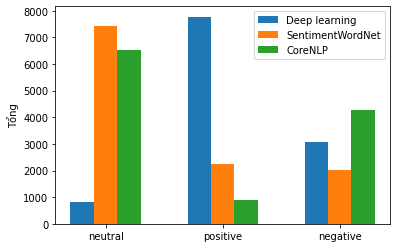

In [ ]:
import matplotlib.pyplot as plt

labels = ['neutral', 'positive', 'negative']
x = np.arange(len(labels))
width = 0.2
fig, ax = plt.subplots()
ax.bar(x - width, deep, width, label='Deep learning')
ax.bar(x, wordnet, width, label='SentimentWordNet')
ax.bar(x + width, corenlp, width, label='CoreNLP')
ax.set_ylabel('Tổng')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()


In [ ]:
def mini_process(text):
  text = re.sub(r'@\w+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'\d', '', text)
  text=re.sub(r'[^\w]', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  return text

text = df['Tweets\n{Realtime from API Twitter}'].apply(mini_process)


In [ ]:
def extract_person_names(text):
    # Tách từ và gán nhãn từ loại
    person_names = []
    for i in text:

      tokenized = word_tokenize(i)
      # print(tokenized)
      # print(tokenized)
      pos_tagged = pos_tag(tokenized)

      # Phân tích cây thực thể có tên
      named_entities_tree = ne_chunk(pos_tagged)

      # Trích xuất các thực thể có tên loại PERSON
      # person_names = []
      for t in named_entities_tree.subtrees():
          if t.label() == 'PERSON':
              person_name = ' '.join([token for token, pos in t.leaves()])
              person_names.append(person_name)

    return person_names


list_person_names = extract_person_names(text)
print(list_person_names)

['Obama Trump Bernie', 'Trumpthey', 'Trump', 'Mitch', 'Trump', 'Butthe', 'Fund', 'Fund CEO Positive', 'Trump', 'Trump', 'Shut Up Kim', 'Donald Trump', 'Trump', 'Trump', 'Against', 'Donald Trump', 'Tillis', 'Will', 'Deny', 'Never', 'Bone Spurs', 'Trump', 'Obama', 'Obama', 'Steve Mnuchinor Trump', 'Trump', 'Trump', 'Cohen', 'Trump', 'Kim', 'Vietnam PM EST Feb', 'Gary', 'Cohn', 'Trump', 'Matt Gaetz', 'Nick', 'Kim Jong Un', 'Kim', 'Kim Knows', 'Trump', 'Jack', 'Vietnam', 'Party NoKo', 'Kim', 'Trump', 'Emergency Declaration', 'Border Wall', 'Trump', 'Trumpyou', 'Vietnam Vet', 'Sexy Young Lady', 'Clinton', 'Bush Obummer', 'Michael', 'Cohen', 'Trump', 'Hager', 'Trump', 'Kim', 'Trump', 'Humpty', 'Trumpty', 'Kim', 'Ivanka', 'Ocasio Cortez', 'Green New Deal Axios', 'Trump', 'Get', 'Donald', 'Trump', 'Rachel', 'Maddow Michael Cohen', 'Testimony Could', 'Kim Jong Un', 'Donald Trump', 'Trump', 'Trump', 'Nahyou', 'Kim', 'Lmfao', 'Trump', 'Trump', 'Sorry P', 'Trump', 'Jack Kirby', 'Michael Cohenin Ho

In [ ]:
count = {}
set_person_names = set(list_person_names)
for i in set_person_names:
  count[i] = list_person_names.count(i)


sorted_items = sorted(count.items(), key=lambda x: x[1], reverse=True)
sorted_dict_name = {item[0]: item[1] for item in sorted_items}

# print(sorted_dict)

persons_names = []
persons__count = []

for name,value in sorted_dict_name.items():
  persons_names.append(name)
  persons__count.append(value)

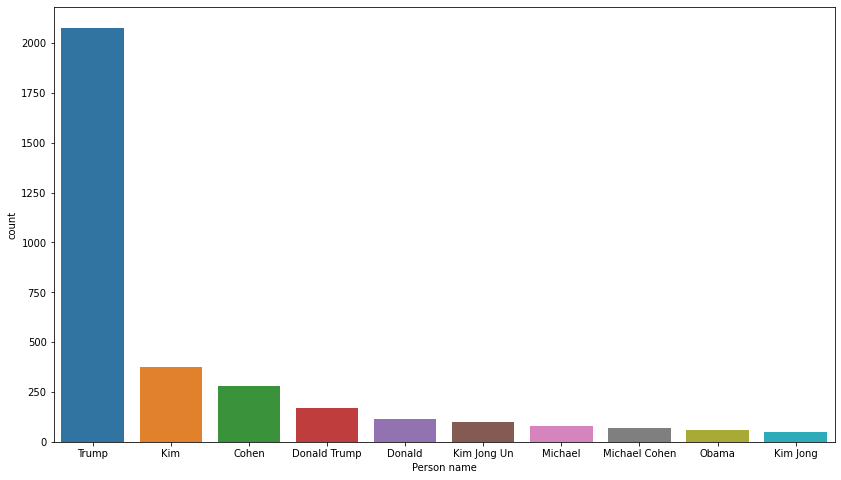

In [ ]:
plt.figure(figsize = (14, 8))

  
sns.barplot(x=persons_names[:10], y=persons__count[:10])
plt.xlabel('Person name')
plt.ylabel('count')
plt.show()

In [ ]:
import pycountry

def extract_country_names(text):
    countries = []
    for i in text:
      # print(i)
    # Tìm tất cả các quốc gia có trong văn bản
      for country in pycountry.countries:
          if country.name.lower() in i.lower():
              countries.append(country.name)

    return countries

country_names = extract_country_names(text)
print(country_names)

['Canada', 'India', 'United States', 'Oman', 'China', 'Saudi Arabia', 'Oman', 'United States', 'India', 'Pakistan', 'Haiti', 'Italy', 'Pakistan', 'Pakistan', 'China', 'Kenya', 'Niger', 'Nigeria', 'Oman', 'Oman', 'Turkey', 'Saudi Arabia', 'Puerto Rico', 'Germany', 'China', 'Iraq', 'Pakistan', 'Indonesia', 'Oman', 'India', 'Viet Nam', 'Pakistan', 'Germany', 'Poland', 'Jordan', 'United States', 'France', 'Yemen', 'Spain', 'Yemen', 'Oman', 'China', 'Australia', 'China', 'Singapore', 'Oman', 'India', 'Pakistan', 'Mexico', 'Niger', 'Nigeria', 'India', 'China', 'Jordan', 'China', 'Oman', 'China', 'United States', 'Turkey', 'Oman', 'Japan', 'China', 'Jordan', 'India', 'Pakistan', 'India', 'Pakistan', 'China', 'India', 'Pakistan', 'Jordan', 'Japan', 'China', 'Australia', 'China', 'Brazil', 'Viet Nam', 'Israel', 'Oman', 'Oman', 'United States', 'Mexico', 'Jordan', 'Oman', 'Mexico', 'China', 'United States', 'Viet Nam', 'Oman', 'India', 'Oman', 'United States', 'Panama', 'United States', 'Saudi A

In [ ]:
count_country = {}
set_country_names = set(country_names)
for i in set_country_names:
  count_country[i] = country_names.count(i)


sorted_items = sorted(count_country.items(), key=lambda x: x[1], reverse=True)
sorted_dict_country = {item[0]: item[1] for item in sorted_items}

country_name = []
country_count = []

for name,value in sorted_dict_country.items():
  country_name.append(name)
  country_count.append(value)


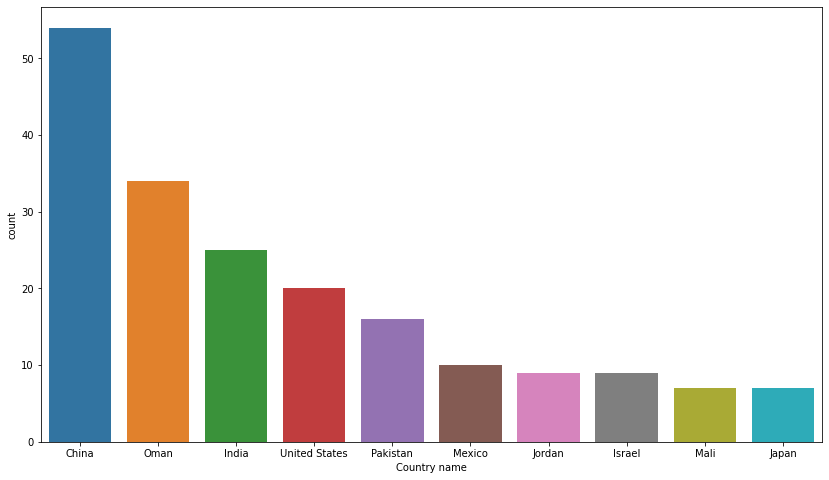

In [ ]:
plt.figure(figsize = (14, 8))

  
sns.barplot(x=country_name[:10], y=country_count[:10])
plt.xlabel('Country name')
plt.ylabel('count')
plt.show()